In [4]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.layers import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2024-02-15 20:01:37.384075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 20:01:37.384133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 20:01:37.385288: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 20:01:37.392976: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-15 20:01:40.556905: I exter

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12093389032725529320
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10957429145
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3368206491587698276
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


2024-02-15 20:01:41.914620: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 20:01:41.916789: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 20:01:41.918656: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
drug_list = ["AEW541","Erlotinib","17-AAG","AZD0530"]
# hyperparameters of CNN
num_classes = 1
learning_rate = 0.0002
training_epochs = 40
batch_size = 50

datasetdir = "/home/jnbera43/Naya_Lynx/data"
resultdir = "/home/jnbera43/Naya_Lynx/Model_generation"

Starttime: 20240215
drug:AEW541
train_X shape: (392, 18988, 1)
392 train samples
98 test samples
StartTime : 2024-02-15 20:01:48.583168


2024-02-15 20:01:48.583726: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 20:01:48.585807: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 20:01:48.587706: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

StartTime : 2024-02-15 20:01:48.845032
Epoch 1/40


2024-02-15 20:01:52.990199: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8900
2024-02-15 20:01:58.774080: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdc88015e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-15 20:01:58.774125: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-02-15 20:01:58.783029: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708027318.913559   18139 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 [==============================] - 15s 193ms/step - loss: 2.4057 - mse: 2.4057 - mae: 1.4451 - val_loss: 1.6698 - val_mse: 1.6698 - val_mae: 1.1952
Epoch 2/40
8/8 [==============================] - 0s 24ms/step - loss: 1.2975 - mse: 1.2975 - mae: 1.0139 - val_loss: 0.6779 - val_mse: 0.6779 - val_mae: 0.6413
Epoch 3/40
8/8 [==============================] - 0s 23ms/step - loss: 0.8873 - mse: 0.8873 - mae: 0.7078 - val_loss: 0.7527 - val_mse: 0.7527 - val_mae: 0.4677
Epoch 4/40
8/8 [==============================] - 0s 24ms/step - loss: 0.8822 - mse: 0.8822 - mae: 0.6664 - val_loss: 0.6402 - val_mse: 0.6402 - val_mae: 0.5575
Epoch 5/40
8/8 [==============================] - 0s 23ms/step - loss: 0.8398 - mse: 0.8398 - mae: 0.7111 - val_loss: 0.6690 - val_mse: 0.6690 - val_mae: 0.6457
Epoch 6/40
8/8 [==============================] - 0s 23ms/step - loss: 0.7990 - mse: 0.7990 - mae: 0.7257 - val_loss: 0.6408 - val_mse: 0.6408 - val_mae: 0.5731
Epoch 7/40
8/8 [===========================

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


AZD0530’s final rmse value is = 0.675740
AZD0530 R-squared value is = 0.089416


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


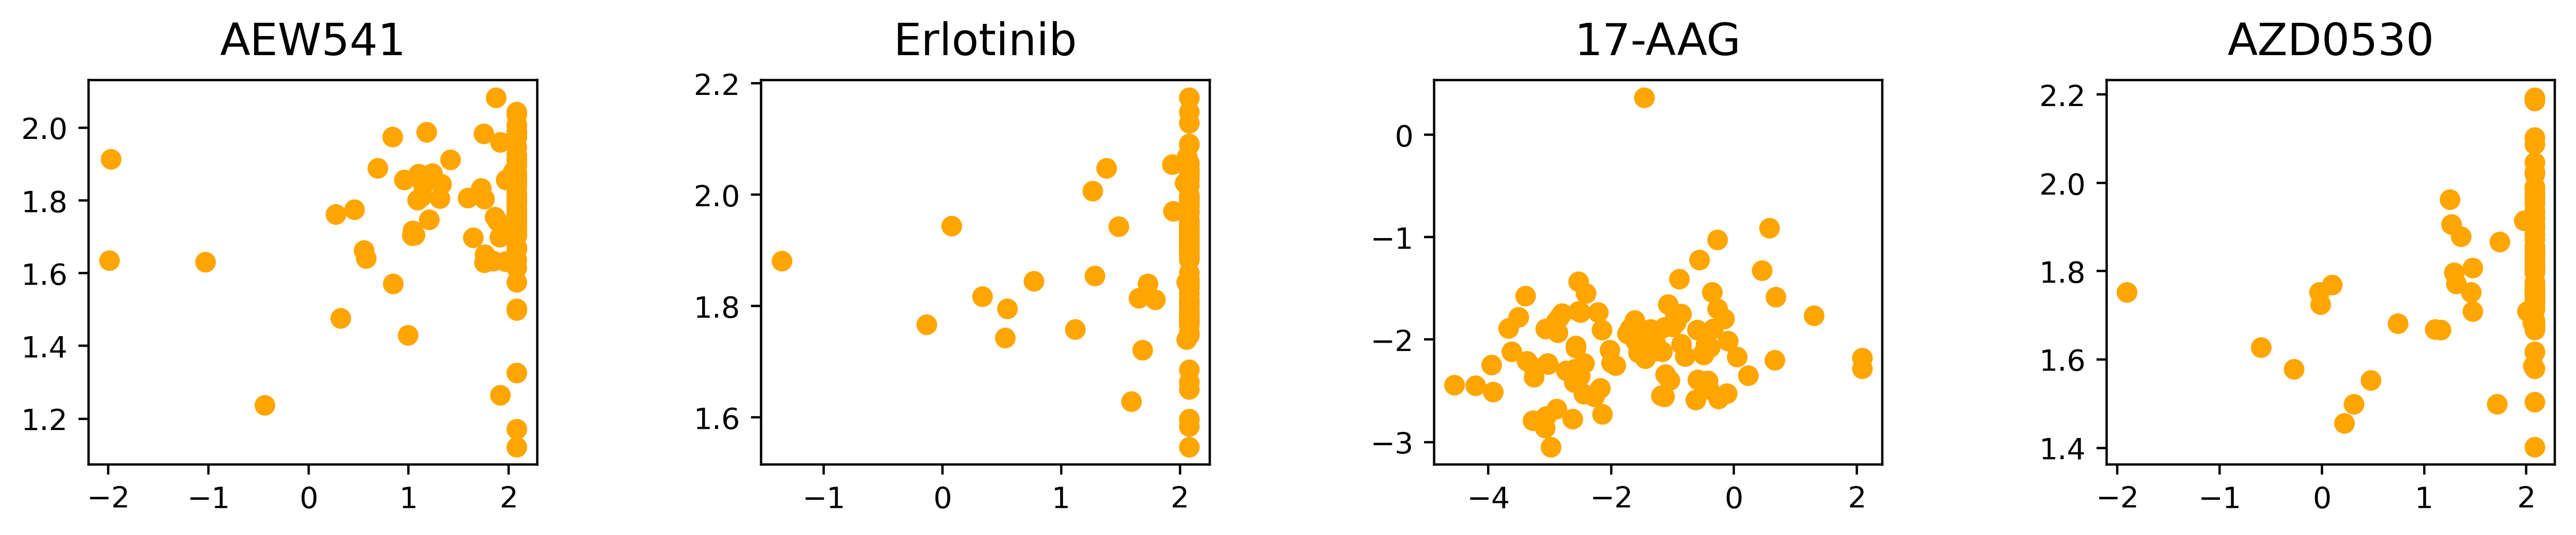

In [6]:
from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('drug:%s' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "/geneExp_%s.npz" % dname)
    ss0 = np.load(datasetdir + '/geneExp_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # z-normalization
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]
    
    from sklearn import preprocessing
    import pickle
    scaler = preprocessing.StandardScaler()
    train_X = scaler.fit_transform(train_X)
    pickle.dump(scaler, open(datasetdir + "/standardization_models/znorm_scaler_%s.pkl" % dname, 'wb'))
    test_X = scaler.transform(test_X)
    
    # data reshape for CNN
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
    
    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model architecture
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # In[10]:
    with tf.device('/GPU:0'):
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(inputs)
        maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
        conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
        maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
        flatten_cell_line = Flatten()(maxpool_cell_line_2)
        dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
        dropout_cell_line = Dropout(0.1)(dense_cell_line)

        dense_1 = Dense(300, activation='tanh')(dropout_cell_line)
        dropout_1 = Dropout(0.1)(dense_1)
        reshape_1 = Reshape((300, 1))(dropout_1)
        conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
        maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
        conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
        maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
        conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
        maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
        dropout_2 = Dropout(0.1)(maxpool_3)
        flatten = Flatten()(dropout_2)
        dropout_3 = Dropout(0.2)(flatten)

        predictions = Dense(1, activation='linear')(dropout_3)



        model = Model(inputs=inputs, outputs=predictions, name='Test_DNN')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adam(learning_rate),
                      metrics=['mse','mae'])
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    with tf.device('/GPU:0'):
        model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                            validation_data=(test_X, test_y))

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    import json
    from keras.models import model_from_json, load_model

    # Option 1: Save Weights + Architecture
    model.save_weights(resultdir+ '/CNN/geneExp_znorm_CNN_%s.h5' % dname)
    with open(resultdir + '/CNN/geneExp_znorm_CNN_%s.json' % dname, 'w') as f:
        f.write(model.to_json())
    
    
    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '/CNN/predicted_table/geneExp_CNN_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1

In [8]:
!wget 'https://mega.nz/folder/SXhXTKYK#T1skByytOWobMHa7Hv3j6A/file/jLRECLIJ'

--2024-02-15 20:26:00--  https://mega.nz/folder/SXhXTKYK
Resolving mega.nz (mega.nz)... 31.216.144.5, 31.216.145.5, 2a0b:e46:1:144::5, ...
Connecting to mega.nz (mega.nz)|31.216.144.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2388 (2.3K) [text/html]
Saving to: ‘SXhXTKYK.1’

SXhXTKYK.1          100%[===================>]   2.33K  --.-KB/s    in 0s      

2024-02-15 20:26:01 (92.0 MB/s) - ‘SXhXTKYK.1’ saved [2388/2388]

